In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_original_data = train_data.copy()
test_original_data = test_data.copy()

In [5]:
train_data.columns

# 12 independent variables and 1 target variable ---> Loan status

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train_data.shape

(614, 13)

In [8]:
test_data.shape

(367, 12)

In [9]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train_data['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

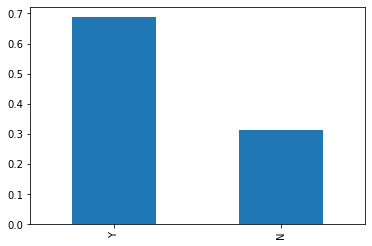

In [11]:
train_data['Loan_Status'].value_counts(normalize = True).plot.bar()

<AxesSubplot:title={'center':'Gender'}>

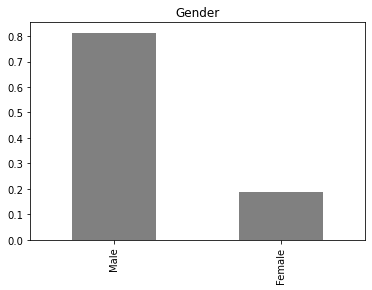

In [12]:
train_data['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender', color = 'grey')

<AxesSubplot:title={'center':'Married'}>

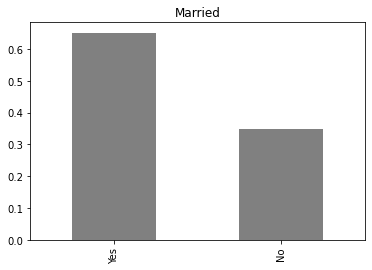

In [13]:
train_data['Married'].value_counts(normalize = True).plot.bar(title = 'Married', color = 'grey')

<AxesSubplot:title={'center':'Self employed'}>

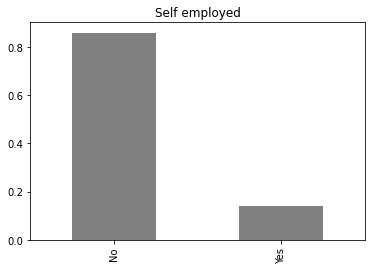

In [14]:
train_data['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self employed', color = 'grey')

<AxesSubplot:title={'center':'Credit history'}>

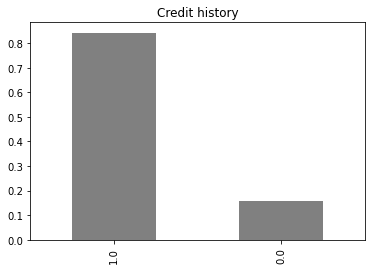

In [15]:
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title = 'Credit history', color = 'grey')

### Inferences

1. 69% of the loan applications are approved
2. 80 % of the loan applicants were male
3. 65 % were married
4. 15% were self-employed
5. 80% of the applicants had credit history and paid their loan

<AxesSubplot:title={'center':'Education'}>

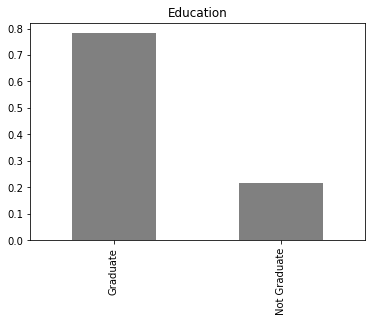

In [16]:
train_data['Education'].value_counts(normalize= True).plot.bar(title = 'Education', color = 'grey')

<AxesSubplot:title={'center':'Dependents'}>

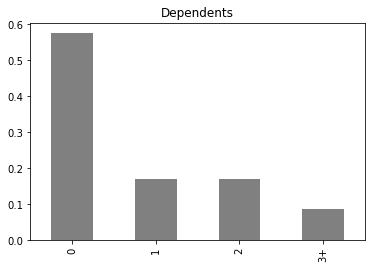

In [17]:
train_data['Dependents'].value_counts(normalize= True).plot.bar(title = 'Dependents', color = 'grey')

<AxesSubplot:title={'center':'Property area'}>

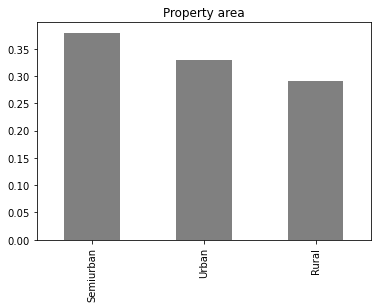

In [18]:
train_data['Property_Area'].value_counts(normalize= True).plot.bar(title = 'Property area', color = 'grey')

## Inferences

1. More than 75% of the applicants are graduates
2. Most of the applicants do not have any dependents
3. Most of the applicants are from semi-urban area

C:\Users\ishri\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

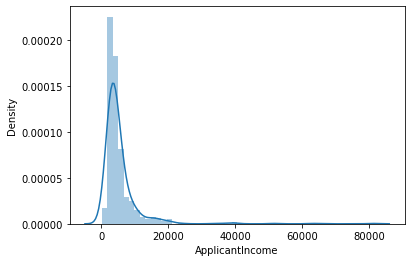

In [35]:
sns.distplot(train_data['ApplicantIncome'])

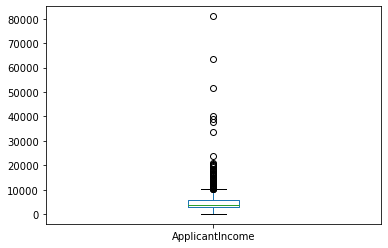

In [36]:
train_data['ApplicantIncome'].plot.box()
plt.show()

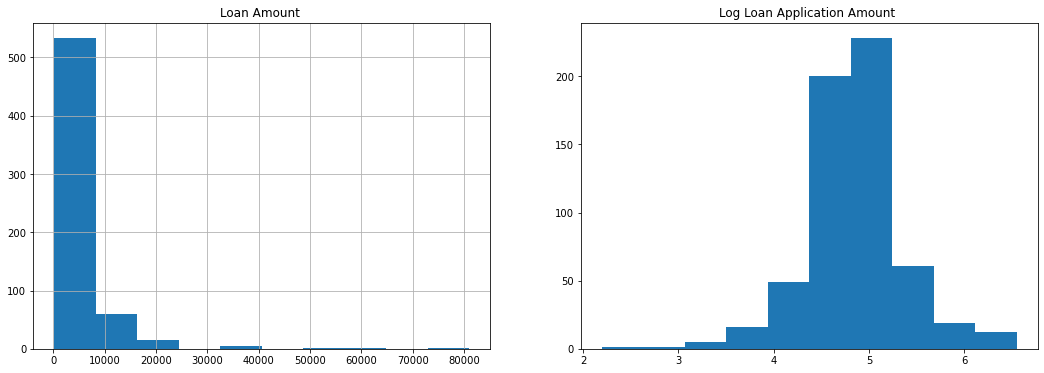

In [22]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


train_data['ApplicantIncome'].hist(bins=10)
plt.title("Loan Amount ")

plt.subplot(1, 2, 2)
plt.hist(np.log(train_data['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

Text(0.5, 0.98, '')

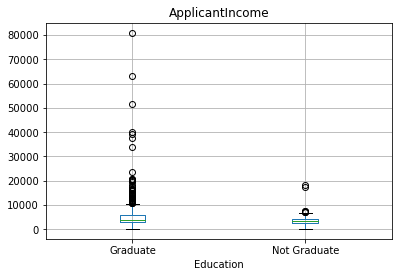

In [38]:
train_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

# Graduates with very high income seem to be an outlier

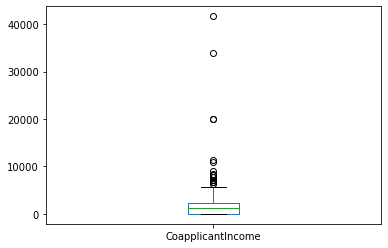

In [39]:
train_data['CoapplicantIncome'].plot.box()
plt.show()

C:\Users\ishri\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


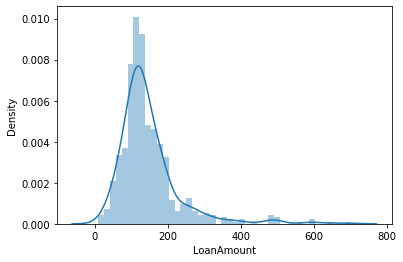

In [42]:
sns.distplot(train_data['LoanAmount'])
plt.show()

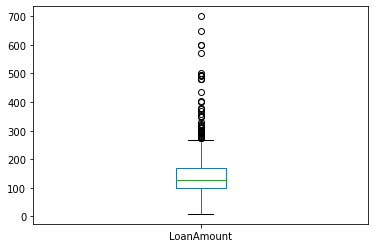

In [43]:
train_data['LoanAmount'].plot.box()
plt.show()

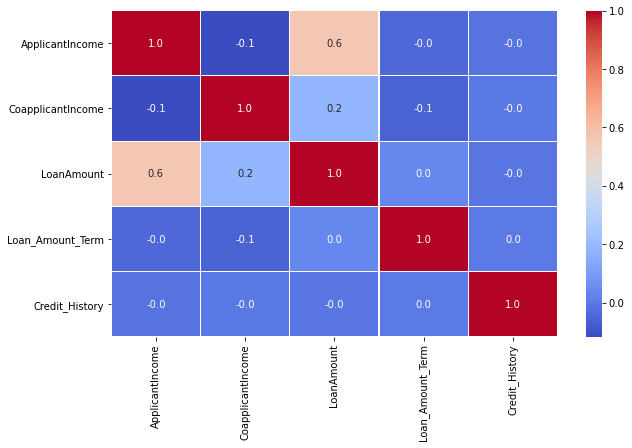

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

## Missing values

In [37]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace=True)

## Converting categorical values into numerical

In [40]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
train_data['Credit_History'].fillna(train_data['Credit_History'].mean(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mean(), inplace=True)

In [45]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)

In [47]:
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)

In [49]:
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)

In [51]:
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)

In [55]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [56]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [60]:
from sklearn.preprocessing import LabelEncoder
features = ['Property_Area','Education', 'Dependents']
encoder = LabelEncoder()
for col in features:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.fit_transform(test_data[col])

In [64]:
train_data.Loan_Status = train_data.Loan_Status.replace({"Y": 1, "N" : 0})
train_data.Gender = train_data.Gender.replace({"Male": 1, "Female" : 0})
test_data.Gender = test_data.Gender.replace({"Male": 1, "Female" : 0})
train_data.Married = train_data.Married.replace({"Yes": 1, "No" : 0})
test_data.Married = test_data.Married.replace({"Yes": 1, "No" : 0})
train_data.Self_Employed = train_data.Self_Employed.replace({"Yes": 1, "No" : 0})
test_data.Self_Employed = test_data.Self_Employed.replace({"Yes": 1, "No" : 0})

In [65]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## ML model

In [66]:
train_features = ['Education', 'Credit_History', 'Gender']

x_train = train_data[train_features].values
y_train = train_data['Loan_Status'].values

x_test = test_data[train_features].values

In [67]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [68]:
predicted_values = logistic_model.predict(x_test)

In [70]:
print('Coefficient of model :', logistic_model.coef_)
print('Intercept of model',logistic_model.intercept_)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

Coefficient of model : [[-0.3059193   3.316164    0.09398266]]
Intercept of model [-1.98307795]
accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [71]:
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\ishri\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [84]:
import pickle as pkl

filename = 'loan_prediction_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb'))